In [1]:
%pylab inline
import re
import pandas as pd
import numpy as np
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sb

In [3]:
allSeqs = pd.read_pickle("/home/vxue/data/sort_specificity/intersectData_noFilter_outerjoin.pickle")

In [4]:
len(allSeqs)

11321

In [5]:
allSeqs.columns.values

array(['bg', 'seq', 'm1_p0', 'm1_p1', 'm1_p2', 'm1_p3', 'm1_p4', 'm1_p5',
       'm1_p6', 'm1_p7', 'm1_p8', 'm1_p9', 'm1_p10', 'm1_p11',
       'm1_expectedValue', 'm1_CN_0', 'm1_CN_1', 'm1_CN_2', 'm1_CN_3',
       'm1_CN_4', 'm1_CN_5', 'm1_CN_6', 'm1_CN_7', 'm1_CN_8', 'm1_CN_9',
       'm1_CN_10', 'm1_CN_11', 'm1_CN_tot', 'm1_isUnimodal', 'm1r_p0',
       'm1r_p1', 'm1r_p2', 'm1r_p3', 'm1r_p4', 'm1r_p5', 'm1r_p6',
       'm1r_p7', 'm1r_p8', 'm1r_p9', 'm1r_p10', 'm1r_p11',
       'm1r_expectedValue', 'm1r_CN_0', 'm1r_CN_1', 'm1r_CN_2', 'm1r_CN_3',
       'm1r_CN_4', 'm1r_CN_5', 'm1r_CN_6', 'm1r_CN_7', 'm1r_CN_8',
       'm1r_CN_9', 'm1r_CN_10', 'm1r_CN_11', 'm1r_CN_tot',
       'm1r_isUnimodal', 'protein', 'Bcl-xl_100nM_p0', 'Bcl-xl_100nM_p1',
       'Bcl-xl_100nM_p2', 'Bcl-xl_100nM_p3', 'Bcl-xl_100nM_p4',
       'Bcl-xl_100nM_p5', 'Bcl-xl_100nM_p6', 'Bcl-xl_100nM_p7',
       'Bcl-xl_100nM_p8', 'Bcl-xl_100nM_p9', 'Bcl-xl_100nM_p10',
       'Bcl-xl_100nM_p11', 'Bcl-xl_100nM_expectedValu

In [6]:
def rescaleToInput2(input1,input2):
    
    idx = np.isfinite(input1) & np.isfinite(input2)
    target = input2
    slope,offset = np.polyfit(input1[idx],input2[idx],1)
    remapped = input1*slope+offset
    
    return remapped
    
    

In [7]:
m1_remapped = rescaleToInput2(allSeqs['m1_expectedValue'],allSeqs['m1r_expectedValue'])
allSeqs['m1_remapped'] = m1_remapped
allSeqs['m1_mean'] = allSeqs[['m1_remapped','m1r_expectedValue']].mean(axis=1,skipna=False)
allSeqs['m1_consistent'] = np.abs(allSeqs['m1_remapped'] - allSeqs['m1r_expectedValue'])<1

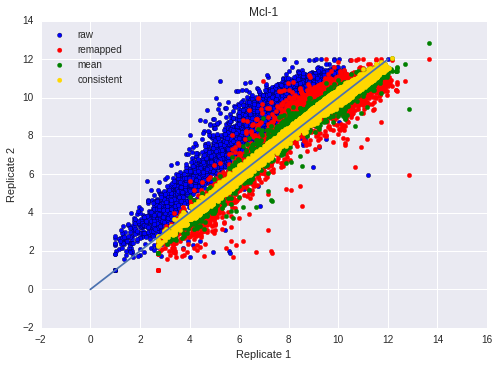

In [8]:
scatter(allSeqs['m1_expectedValue'],allSeqs['m1r_expectedValue'],label='raw')
scatter(m1_remapped,allSeqs['m1r_expectedValue'],color='red',label='remapped')
plot([0,12],[0,12])
scatter(allSeqs['m1_remapped'],allSeqs['m1_mean'],color='green',label='mean')
scatter(allSeqs[allSeqs.m1_consistent]['m1_remapped'],allSeqs[allSeqs.m1_consistent]['m1_mean'],color='gold',label='consistent')

m1_relativeScore = (allSeqs[allSeqs.m1_consistent]['m1_mean']-np.min(allSeqs[allSeqs.m1_consistent]['m1_mean']))/\
np.max(allSeqs[allSeqs.m1_consistent]['m1_mean']-np.min(allSeqs[allSeqs.m1_consistent]['m1_mean']))

xlabel("Replicate 1")
ylabel("Replicate 2")
allSeqs['m1_relativeScore'] = m1_relativeScore
legend(loc=2)
title("Mcl-1")

In [9]:
x1_remapped = rescaleToInput2(allSeqs['x1_expectedValue'],allSeqs['BCL-xl_1nM_expectedValue'])
allSeqs['x1_remapped'] = x1_remapped
allSeqs['x1_mean'] = allSeqs[['x1_remapped','BCL-xl_1nM_expectedValue']].mean(axis=1,skipna=False)
allSeqs['x1_consistent'] = np.abs(allSeqs['x1_remapped'] - allSeqs['BCL-xl_1nM_expectedValue'])<1

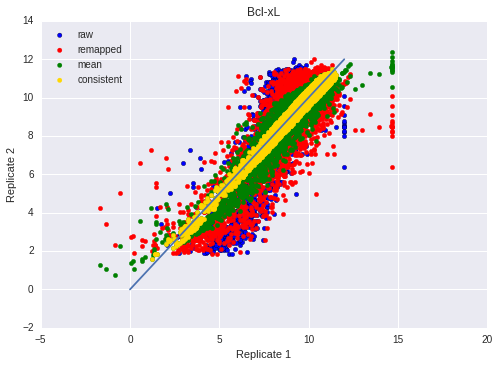

In [10]:
scatter(allSeqs['x1_expectedValue'],allSeqs['BCL-xl_1nM_expectedValue'],label='raw')
scatter(allSeqs['x1_remapped'],allSeqs['BCL-xl_1nM_expectedValue'],color='red',label='remapped')
plot([0,12],[0,12])
scatter(allSeqs['x1_remapped'],allSeqs['x1_mean'],color='green',label='mean')
scatter(allSeqs[allSeqs.x1_consistent]['x1_remapped'],allSeqs[allSeqs.x1_consistent]['x1_mean'],color='gold',label='consistent')

x1_relativeScore = (allSeqs[allSeqs.x1_consistent]['x1_mean']-np.min(allSeqs[allSeqs.x1_consistent]['x1_mean']))/\
np.max(allSeqs[allSeqs.x1_consistent]['x1_mean']-np.min(allSeqs[allSeqs.x1_consistent]['x1_mean']))
xlabel("Replicate 1")
ylabel("Replicate 2")
legend(loc=2)
allSeqs['x1_relativeScore'] = x1_relativeScore
title("Bcl-xL")

In [11]:
f100_remapped = rescaleToInput2(allSeqs['bfl1_expectedValue'],allSeqs['BFL1_100nM_expectedValue'])
allSeqs['f100_remapped'] = f100_remapped
allSeqs['f100_mean'] = allSeqs[['f100_remapped','BFL1_100nM_expectedValue']].mean(axis=1,skipna=False)
allSeqs['f100_consistent'] = np.abs(allSeqs['f100_remapped'] - allSeqs['BFL1_100nM_expectedValue'])<1

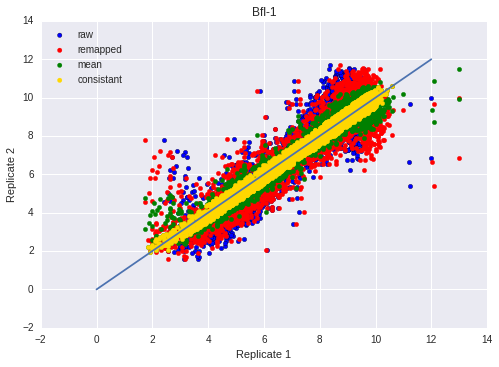

In [12]:
scatter(allSeqs['bfl1_expectedValue'],allSeqs['BFL1_100nM_expectedValue'],label='raw')
scatter(allSeqs['f100_remapped'],allSeqs['BFL1_100nM_expectedValue'],color='red',label='remapped')
plot([0,12],[0,12])
scatter(allSeqs['f100_remapped'],allSeqs['f100_mean'],color='green',label='mean')
scatter(allSeqs[allSeqs.f100_consistent]['f100_remapped'],allSeqs[allSeqs.f100_consistent]['f100_mean'],color='gold',label='consistant')

f100_relativeScore = (allSeqs[allSeqs.f100_consistent]['f100_mean']-np.min(allSeqs[allSeqs.f100_consistent]['f100_mean']))/\
    np.max(allSeqs[allSeqs.f100_consistent]['f100_mean']-np.min(allSeqs[allSeqs.f100_consistent]['f100_mean']))
xlabel("Replicate 1")
ylabel("Replicate 2")
legend(loc=2)
allSeqs['f100_relativeScore'] = f100_relativeScore
title("Bfl-1")

In [13]:
x100_remapped = rescaleToInput2(allSeqs['Bcl-xl_100nM_expectedValue'],allSeqs['x100_expectedValue'])
allSeqs['x100_remapped'] = x100_remapped
allSeqs['x100_mean'] = allSeqs[['x100_remapped','x100_expectedValue']].mean(axis=1,skipna=False)
allSeqs['x100_consistent'] = np.abs(allSeqs['x100_remapped'] - allSeqs['x100_expectedValue'])<1

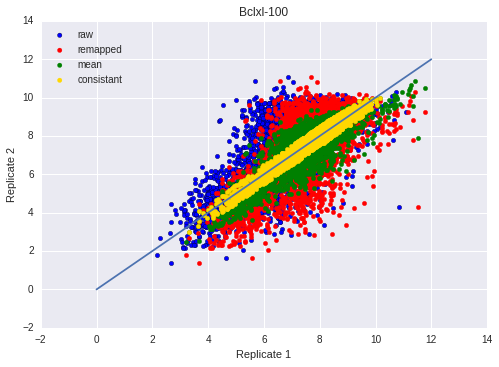

In [14]:
scatter(allSeqs['Bcl-xl_100nM_expectedValue'],allSeqs['x100_expectedValue'],label='raw')
scatter(allSeqs['x100_remapped'],allSeqs['x100_expectedValue'],color='red',label='remapped')
plot([0,12],[0,12])
scatter(allSeqs['x100_remapped'],allSeqs['x100_mean'],color='green',label='mean')
scatter(allSeqs[allSeqs.x100_consistent]['x100_remapped'],allSeqs[allSeqs.x100_consistent]['x100_mean'],color='gold',label='consistant')

x100_relativeScore = (allSeqs[allSeqs.x100_consistent]['x100_mean']-np.min(allSeqs[allSeqs.x100_consistent]['x100_mean']))/\
    np.max(allSeqs[allSeqs.x100_consistent]['x100_mean']-np.min(allSeqs[allSeqs.x100_consistent]['x100_mean']))
xlabel("Replicate 1")
ylabel("Replicate 2")
legend(loc=2)
allSeqs['x100_relativeScore'] = x100_relativeScore
title("Bclxl-100")

In [15]:
conditions = allSeqs.m1_consistent & allSeqs.x1_consistent & allSeqs.f100_consistent & allSeqs.x100_consistent

In [16]:
#%matplotlib notebook

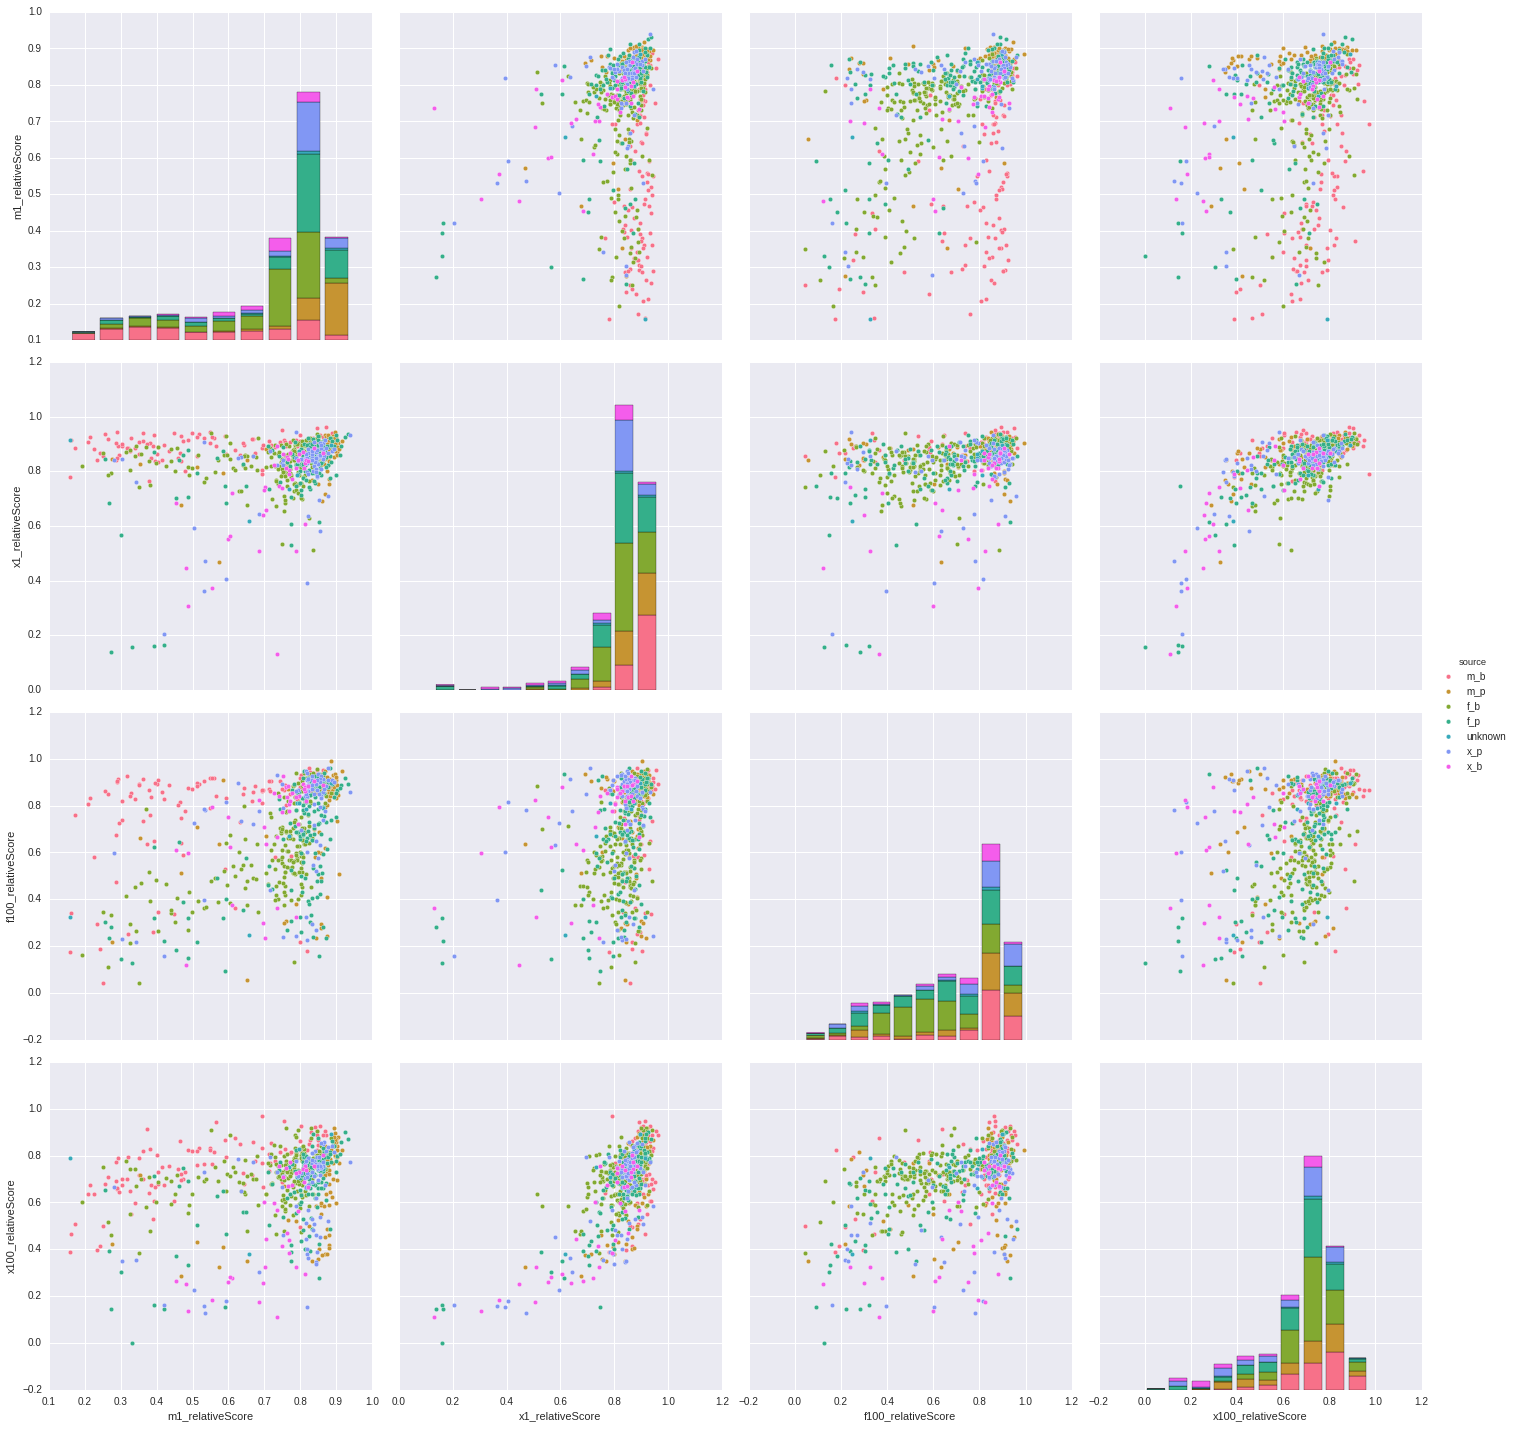

In [17]:
sb.pairplot(allSeqs[conditions][['source','m1_relativeScore','x1_relativeScore','f100_relativeScore','x100_relativeScore']],hue='source',size=5)

In [18]:
uniqueNames = ['Bcl-xl_100nM',
'x100',
'm1',
'm1r',
'x1',
'BCL-xl_1nM',
'bfl1',
'BFL1_100nM']

In [19]:
def isLastGateMax(row,probColumnName):
    myDistribution = list(row[[probColumnName+str(i) for i in range(12)]])

    if(myDistribution[0]==np.nan):
        return np.nan
        
    if(argmax(myDistribution)==0):
        return 1
    elif (argmax(myDistribution)==11):
        return -1
    elif (argmax(myDistribution)==1): #remember the distributions are counting backwards
        return 1
    else:
        return 0

In [20]:
for idx,row in allSeqs.iterrows():
    for each in uniqueNames:
        relativeRank =  isLastGateMax(row,each+"_p")
        allSeqs.loc[idx,each+"_relativeRank"] = relativeRank
    

In [21]:
allSeqs['m1_resolvable'] = (allSeqs['m1_relativeRank']==0) & (allSeqs['m1r_relativeRank']==0) 
allSeqs['x1_resolvable'] =  (allSeqs['x1_relativeRank']==0) & (allSeqs['BCL-xl_1nM_relativeRank']==0) 
allSeqs['x100_resolvable'] =  (allSeqs['Bcl-xl_100nM_relativeRank']==0) & (allSeqs['x100_relativeRank']==0) 
allSeqs['f100_resolvable'] =  (allSeqs['BFL1_100nM_relativeRank']==0) & (allSeqs['bfl1_relativeRank']==0) 

In [22]:
allSeqs['m1_unimodal'] = (allSeqs['m1_isUnimodal']) & (allSeqs['m1r_isUnimodal']) 
allSeqs['x1_unimodal'] =  (allSeqs['x1_isUnimodal']) & (allSeqs['BCL-xl_1nM_isUnimodal']) 
allSeqs['x100_unimodal'] =  (allSeqs['Bcl-xl_100nM_isUnimodal']) & (allSeqs['x100_isUnimodal']) 
allSeqs['f100_unimodal'] =  (allSeqs['BFL1_100nM_isUnimodal']) & (allSeqs['bfl1_isUnimodal']) 

In [23]:
resolvable = allSeqs.m1_resolvable & allSeqs.x1_resolvable & allSeqs.f100_resolvable

In [24]:
allSeqs.to_pickle("/home/vxue/data/sort_specificity/relativeScores.pickle")

In [25]:
len(allSeqs[resolvable])

549

In [26]:
len(allSeqs[conditions])

661

In [27]:
len(allSeqs[(conditions) & (resolvable)])

60

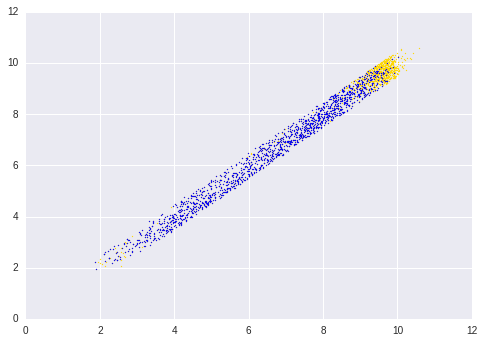

In [28]:
scatter(allSeqs[allSeqs.f100_consistent]['f100_remapped'],allSeqs[allSeqs.f100_consistent]['f100_mean'],color='gold',label='consistant',s=1)
scatter(allSeqs[(allSeqs.f100_resolvable) & (allSeqs.f100_consistent)]['f100_remapped'],
        allSeqs[(allSeqs.f100_resolvable) & (allSeqs.f100_consistent)]['f100_mean'],color='blue',label='consistant',s=1)


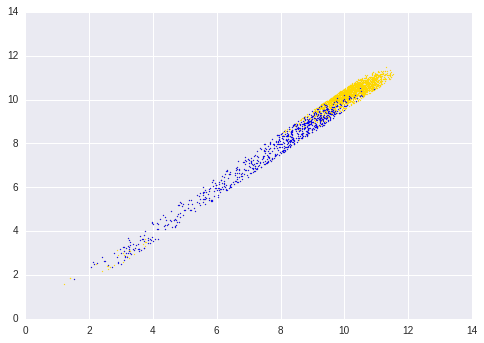

In [29]:
scatter(allSeqs[allSeqs.x1_consistent]['x1_remapped'],allSeqs[allSeqs.x1_consistent]['x1_mean'],color='gold',label='consistant',s=1)
scatter(allSeqs[(allSeqs.x1_resolvable) & (allSeqs.x1_consistent)]['x1_remapped'],
        allSeqs[(allSeqs.x1_resolvable) & (allSeqs.x1_consistent)]['x1_mean'],color='blue',label='consistant',s=1)


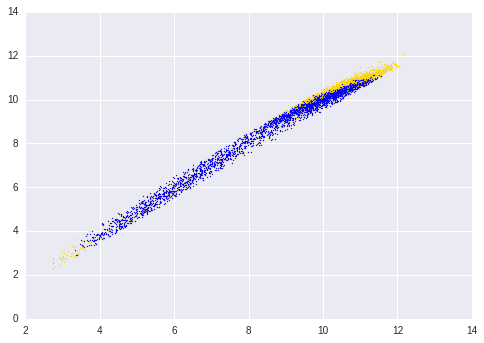

In [30]:
scatter(allSeqs[allSeqs.m1_consistent]['m1_remapped'],allSeqs[allSeqs.m1_consistent]['m1_mean'],color='gold',label='consistant',s=1)
scatter(allSeqs[(allSeqs.m1_resolvable) & (allSeqs.m1_consistent)]['m1_remapped'],
        allSeqs[(allSeqs.m1_resolvable) & (allSeqs.m1_consistent)]['m1_mean'],color='blue',label='consistant',s=1)


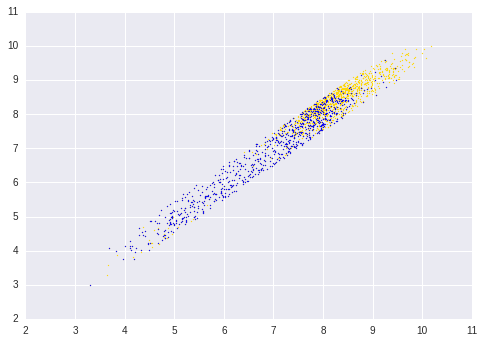

In [31]:
scatter(allSeqs[allSeqs.x100_consistent]['x100_remapped'],allSeqs[allSeqs.x100_consistent]['x100_mean'],color='gold',label='consistant',s=1)
scatter(allSeqs[(allSeqs.x100_resolvable) & (allSeqs.x100_consistent)]['x100_remapped'],
        allSeqs[(allSeqs.x100_resolvable) & (allSeqs.x100_consistent)]['x100_mean'],color='blue',label='consistant',s=1)


In [32]:
def getPlotOfSet(mySet,uniqueString):
    
    fig,ax = plt.subplots()
    for i,row in mySet.iterrows():
        foo = row[[uniqueString+'_p'+str(j) for j in range(12)]].squeeze()
        ax.plot(range(12,0,-1), foo)


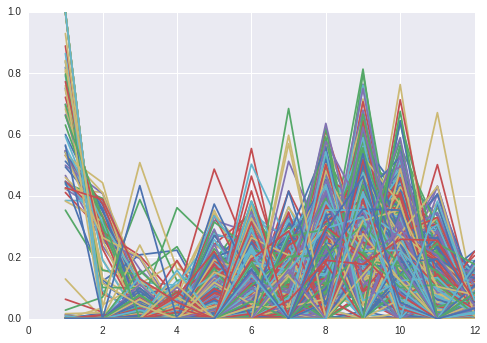

In [33]:
getPlotOfSet (allSeqs[~(allSeqs.m1_resolvable) & (allSeqs.m1_consistent)] , 'm1')

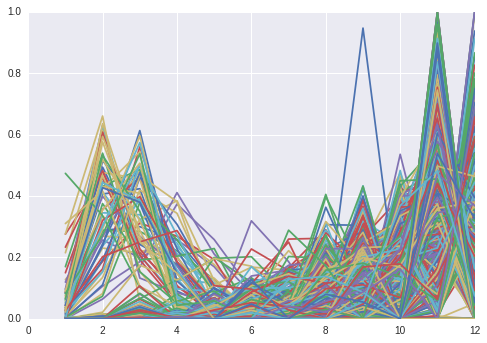

In [34]:
getPlotOfSet (allSeqs[~(allSeqs.m1_resolvable) & (allSeqs.m1_consistent)] , 'm1r')

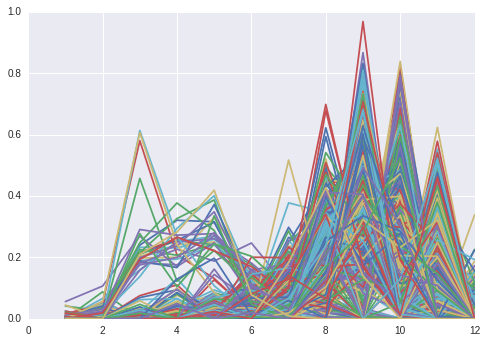

In [35]:
getPlotOfSet (allSeqs[~(allSeqs.x1_resolvable) & (allSeqs.x1_consistent)] , 'x1')

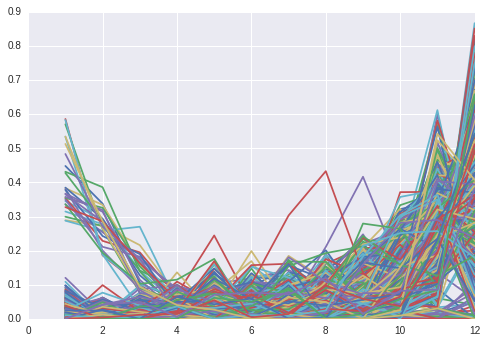

In [36]:
getPlotOfSet (allSeqs[~(allSeqs.x1_resolvable) & (allSeqs.x1_consistent)] , 'BCL-xl_1nM')

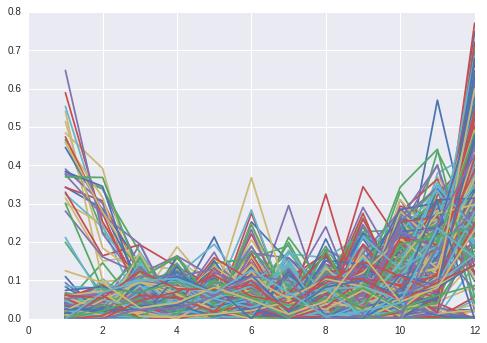

In [37]:
getPlotOfSet (allSeqs[~(allSeqs.f100_resolvable) & (allSeqs.f100_consistent)] , 'BFL1_100nM')

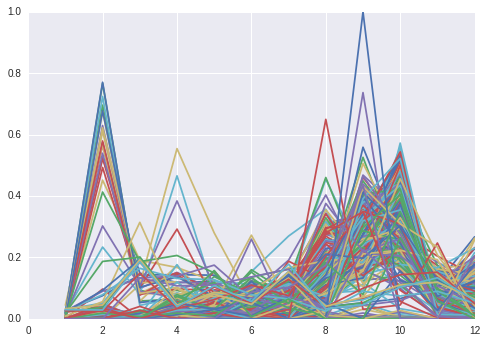

In [38]:
getPlotOfSet (allSeqs[~(allSeqs.f100_resolvable) & (allSeqs.f100_consistent)] , 'bfl1')


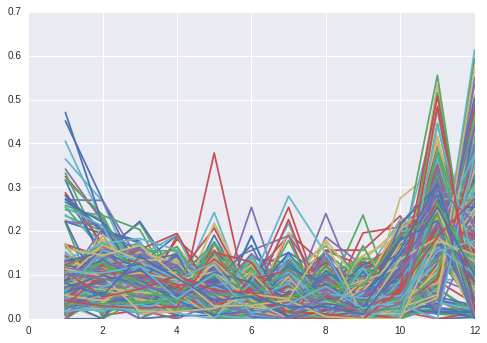

In [39]:
getPlotOfSet (allSeqs[~(allSeqs.x100_resolvable) & (allSeqs.x100_consistent)] , 'Bcl-xl_100nM')


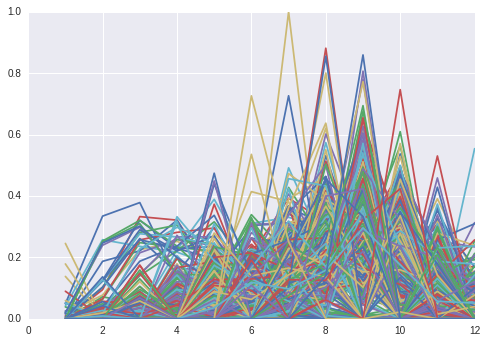

In [40]:
getPlotOfSet (allSeqs[~(allSeqs.x100_resolvable) & (allSeqs.x100_consistent)] , 'x100')
